In [94]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt
%pip install cer
from cer import calculate_cer

pytesseract.pytesseract.tesseract_cmd = r'C:\\Users\\tr4\\AppData\\Local\\Programs\\Tesseract-OCR\\tesseract.exe'

In [136]:
import cv2
import numpy as np
import pytesseract

# Load the image
image = cv2.imread("image1.PNG")

# Preprocessing steps
norm_img = np.zeros((image.shape[0], image.shape[1]))
image = cv2.normalize(image, norm_img, 0, 255, cv2.NORM_MINMAX)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
kernel = np.ones((1, 1), np.uint8)
eroded_image = cv2.erode(gray_image, kernel, iterations=10)
kernel_sharpen = np.array([[0, -1, 0],
                           [-1, 5.5, -1],
                           [0, -1, 0]])
sharpened = cv2.filter2D(eroded_image, -1, kernel_sharpen)

text = pytesseract.image_to_string(sharpened)
lines = text.split('\n')

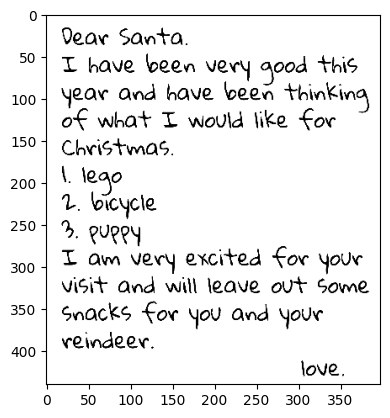

In [137]:
plt.imshow(sharpened, cmap='gray')

In [138]:
lines

['Year Santa.',
 'T have been very good this',
 'year and have been thinkin',
 'o€ what L would like for',
 'ChviStmas.',
 '\\. leao',
 '1. Wieycle',
 '. euRRY',
 'LT am very excited for your',
 'VISIT And will leave out Some',
 'Snacks Lor You and your',
 'veindeer.',
 '',
 'love.',
 '']

In [139]:
original = ["Dear Santa," 
    "I have been very good this", 
    "year and have been thinking",
    "of what I need for",
    "Christmas" ,
    "1. lego",
    "2. Bicycle",
    "3. puppy",
    "I'am very excited for your",
    " visit and will leave out some",
    "snacks for you and your",
    " reindeer."]
cer_score = calculate_cer(lines, original)
print("CER Score:", cer_score)

CER Score 0.2324561403508772
